In [1]:
import numpy as np
import pandas as pd
from arch.unitroot import ADF
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from statsmodels.compat import lzip
data = pd.read_excel('/Users/alexcappadona/Downloads/Target.xlsx', index_col=0)
data.head()

,fyearq,fqtr,tic,conm,datafqtr,niq,revtq
datadate,,,,,,,
1971-04-30,1971,1,TGT,TARGET CORP,1971Q1,1.210,231.645
1971-07-31,1971,2,TGT,TARGET CORP,1971Q2,2.451,254.380
1971-10-31,1971,3,TGT,TARGET CORP,1971Q3,3.536,268.426
1972-01-31,1971,4,TGT,TARGET CORP,1971Q4,17.457,366.305
1972-04-30,1972,1,TGT,TARGET CORP,1972Q1,0.910,248.840


In [2]:
data.tail()

,fyearq,fqtr,tic,conm,datafqtr,niq,revtq
datadate,,,,,,,
2020-01-31,2019,4,TGT,TARGET CORP,2019Q4,834.0,23399.0
2020-04-30,2020,1,TGT,TARGET CORP,2020Q1,284.0,19615.0
2020-07-31,2020,2,TGT,TARGET CORP,2020Q2,1690.0,22975.0
2020-10-31,2020,3,TGT,TARGET CORP,2020Q3,1014.0,22632.0
2021-01-31,2020,4,TGT,TARGET CORP,2020Q4,1380.0,28339.0


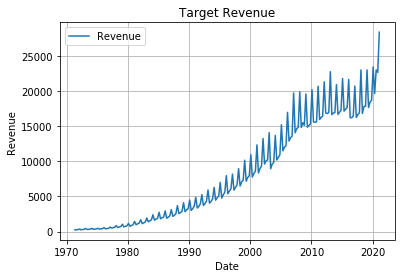

In [3]:
# 1a

plt.figure(1)
plt.plot(data['revtq'], label='Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Target Revenue')
plt.grid(True)
plt.legend()
plt.show()

In [4]:
data['LogRev'] = np.log(data['revtq']) # compute log of revenue
data['dLogRev']=data['LogRev'].diff()
data=data.dropna()
data.head()

,fyearq,fqtr,tic,conm,datafqtr,niq,revtq,LogRev,dLogRev
datadate,,,,,,,,,
1971-07-31,1971,2,TGT,TARGET CORP,1971Q2,2.451,254.380,5.538829,0.093623
1971-10-31,1971,3,TGT,TARGET CORP,1971Q3,3.536,268.426,5.592575,0.053746
1972-01-31,1971,4,TGT,TARGET CORP,1971Q4,17.457,366.305,5.903466,0.310891
1972-04-30,1972,1,TGT,TARGET CORP,1972Q1,0.910,248.840,5.516810,-0.386656
1972-07-31,1972,2,TGT,TARGET CORP,1972Q2,4.112,289.161,5.666984,0.150174


In [5]:
data.describe()

,fyearq,fqtr,niq,revtq,LogRev,dLogRev
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,1995.623116,2.507538,299.784010,8367.376322,8.396216,0.024155
std,14.398150,1.118573,402.928393,7245.243604,1.350030,0.236757
min,1971.000000,1.000000,-2640.000000,248.840000,5.516810,-0.460288
25%,1983.000000,2.000000,33.800000,1729.220500,7.454922,-0.019226
50%,1996.000000,3.000000,182.000000,6073.000000,8.711608,0.059342
75%,2008.000000,3.500000,553.000000,15374.000000,9.640413,0.181686
max,2020.000000,4.000000,1690.000000,28339.000000,10.251994,0.391313


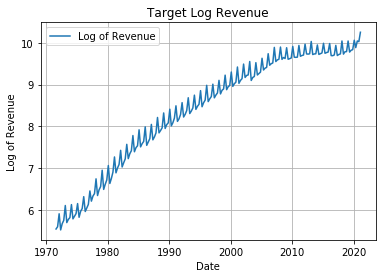

In [6]:
plt.figure(1)
plt.plot(data['LogRev'], label='Log of Revenue')
plt.xlabel('Date')
plt.ylabel('Log of Revenue')
plt.title('Target Log Revenue')
plt.grid(True)
plt.legend()
plt.show()

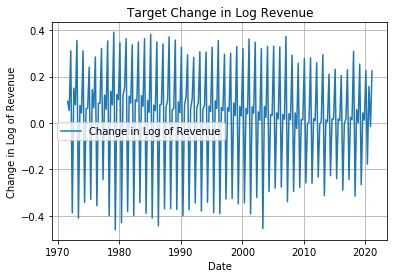

In [7]:
plt.figure(1)
plt.plot(data['dLogRev'], label='Change in Log of Revenue')
plt.xlabel('Date')
plt.ylabel('Change in Log of Revenue')
plt.title('Target Change in Log Revenue')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
# 1b

res = ADF(data['LogRev'], trend="ct", lags=4) 
print(res.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.341
P-value                         0.877
Lags                                4
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.01 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [9]:
# 1b

res = ADF(data['dLogRev'], trend="ct", lags=4) 
print(res.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.518
P-value                         0.001
Lags                                4
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.01 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [10]:
# 1c: AR model with 8 lags

model = smt.arima.ARIMA(data['dLogRev'], trend="ct", order=(8, 0, 0))
results = model.fit()
print(results.summary())
residuals = results.resid

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                dLogRev   No. Observations:                  199
Model:                 ARIMA(8, 0, 0)   Log Likelihood                 379.005
Date:                Tue, 07 Dec 2021   AIC                           -736.010
Time:                        21:27:35   BIC                           -699.784
Sample:                    07-31-1971   HQIC                          -721.349
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0404      0.004      9.409      0.000       0.032       0.049
x1            -0.0002   3.73e-05     -4.521      0.000      -0.000   -9.55e-05
ar.L1         -0.2178      0.072     -3.011      0.0

In [11]:
residuals.head()

datadate
1971-07-31    0.053409
1971-10-31    0.039775
1972-01-31    0.295426
1972-04-30   -0.123697
1972-07-31    0.034473
dtype: float64

In [20]:
# 1c: examining residual autocorrelation
# Ljung-Box test
name = ['Ljung-Box statistic', 'p-value']
test=sms.acorr_ljungbox(residuals, lags=8)
lzip(name, test)

# not sure why mine does this sometime; not actually printing values

[('Ljung-Box statistic', 'lb_stat'), ('p-value', 'lb_pvalue')]

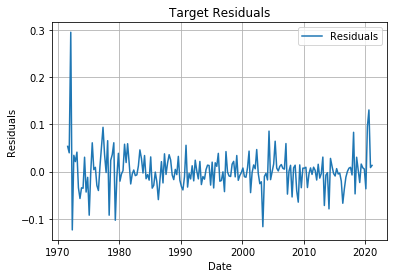

In [13]:
plt.figure(1)
plt.plot(residuals, label='Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Target Residuals')
plt.grid(True)
plt.legend()
plt.show()

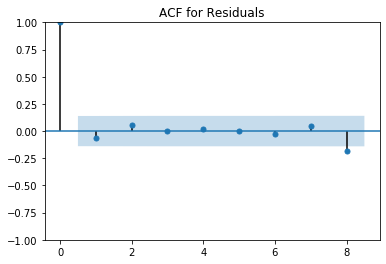

In [14]:
smt.graphics.plot_acf(residuals, lags=8)
plt.title('ACF for Residuals')
plt.show()

In [15]:
data.tail()

,fyearq,fqtr,tic,conm,datafqtr,niq,revtq,LogRev,dLogRev
datadate,,,,,,,,,
2020-01-31,2019,4,TGT,TARGET CORP,2019Q4,834.0,23399.0,10.060449,0.226097
2020-04-30,2020,1,TGT,TARGET CORP,2020Q1,284.0,19615.0,9.884050,-0.176399
2020-07-31,2020,2,TGT,TARGET CORP,2020Q2,1690.0,22975.0,10.042162,0.158112
2020-10-31,2020,3,TGT,TARGET CORP,2020Q3,1014.0,22632.0,10.027120,-0.015042
2021-01-31,2020,4,TGT,TARGET CORP,2020Q4,1380.0,28339.0,10.251994,0.224874


In [16]:
data.head()

,fyearq,fqtr,tic,conm,datafqtr,niq,revtq,LogRev,dLogRev
datadate,,,,,,,,,
1971-07-31,1971,2,TGT,TARGET CORP,1971Q2,2.451,254.380,5.538829,0.093623
1971-10-31,1971,3,TGT,TARGET CORP,1971Q3,3.536,268.426,5.592575,0.053746
1972-01-31,1971,4,TGT,TARGET CORP,1971Q4,17.457,366.305,5.903466,0.310891
1972-04-30,1972,1,TGT,TARGET CORP,1972Q1,0.910,248.840,5.516810,-0.386656
1972-07-31,1972,2,TGT,TARGET CORP,1972Q2,4.112,289.161,5.666984,0.150174


In [17]:
data_insample = data['1971-04-30':'2020-01-31']
data_insample.tail()

,fyearq,fqtr,tic,conm,datafqtr,niq,revtq,LogRev,dLogRev
datadate,,,,,,,,,
2019-01-31,2018,4,TGT,TARGET CORP,2018Q4,798.0,22977.0,10.042249,0.254116
2019-04-30,2019,1,TGT,TARGET CORP,2019Q1,795.0,17627.0,9.777187,-0.265062
2019-07-31,2019,2,TGT,TARGET CORP,2019Q2,938.0,18422.0,9.821301,0.044114
2019-10-31,2019,3,TGT,TARGET CORP,2019Q3,714.0,18664.0,9.834352,0.013051
2020-01-31,2019,4,TGT,TARGET CORP,2019Q4,834.0,23399.0,10.060449,0.226097


In [18]:
model = smt.arima.ARIMA(data_insample['dLogRev'], trend="ct", order=(8, 0, 0))
results = model.fit()
print(results.summary())
# Make forecasts:
results.predict('2020-04-30','2021-01-31', dynamic=False)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                dLogRev   No. Observations:                  195
Model:                 ARIMA(8, 0, 0)   Log Likelihood                 381.703
Date:                Tue, 07 Dec 2021   AIC                           -741.407
Time:                        21:27:43   BIC                           -705.404
Sample:                    07-31-1971   HQIC                          -726.830
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0422      0.004     11.737      0.000       0.035       0.049
x1            -0.0002   3.56e-05     -5.785      0.000      -0.000      -0.000
ar.L1         -0.2683      0.081     -3.326      0.0

2020-04-30   -0.277249
2020-07-31    0.043718
2020-10-31    0.005415
2021-01-31    0.232401
Freq: Q-OCT, Name: predicted_mean, dtype: float64